In [1]:
def hypothesis(X, theta): 
    return np.dot(X, theta) 

def access_val(data, index):
    return data[index]

def mse(res,y):
    errorlist = np.zeros((len(y),1))
    
    for i in range (len(y)):
        error=(1/2)*((res[i]-y[i])**2)
        errorlist[i]=error
        
    return errorlist

In [16]:
#question 1
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('data_lab2_3.txt', sep="\t", header=None)
#data.columns = ["x1", "x2", "y"]

data=np.array(data)
data=np.delete(data,0,0)

data=np.array(data, dtype=float)

txt_train, txt_test = np.split(data, [int(.8*len(data))])

#question 2
X_train = txt_train[:,:2] #toutes les infos jusqu'à la colonne 2 non inclus
Y_train = txt_train[:,2] #toutes les infos de la colonne 2

X_test = txt_test[:,:2]
Y_test = txt_test[:,2]

x1 = txt_train[:,0] #toutes les infos de la colonne 0
x2 = txt_train[:,1]
y = txt_train[:,2]

X_train=np.insert(X_train, 0, [1 for  i in range(159)],axis=1)
X_test=np.insert(X_test, 0, [1 for  i in range(40)],axis=1)

resultatXCFS_LIN = []
resultatXCFS_PAR = []
resultatXCFS_CUB = []
resultatXCFS_RID = []

#print(X_train[:,1]*X_train[:,2])
#print(np.dot(X_train[:,1],X_train[:,2]))
"""LINEAR"""
thetacfsLIN = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(Y_train)

for i in range(3):
    hypothesis=np.dot(thetacfsLIN[i],X_train[:,i])
    
    resultatXCFS_LIN.append(hypothesis)
    
resultatXCFS_LIN = np.sum(resultatXCFS_LIN, axis=0)

print(resultatXCFS_LIN)

"""PARABOLIC"""
X_train=np.insert(X_train, 3, X_train[:,1]**2, axis=1)
X_train=np.insert(X_train, 4, X_train[:,2]**2, axis=1)
X_train=np.insert(X_train, 5, X_train[:,1]*X_train[:,2], axis=1)

thetacfsPAR = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(Y_train)

for i in range(6):
    hypothesis=np.dot(thetacfsPAR[i],X_train[:,i])
    resultatXCFS_PAR.append(hypothesis)
    
resultatXCFS_PAR = np.sum(resultatXCFS_PAR, axis=0)
    
"""CUBIC"""
X_train=np.insert(X_train, 6, X_train[:,1]**3, axis=1)
X_train=np.insert(X_train, 7, X_train[:,2]**3, axis=1)
X_train=np.insert(X_train, 8, (X_train[:,1]**2)*X_train[:,2], axis=1)
X_train=np.insert(X_train, 9, X_train[:,1]*(X_train[:,2]**2), axis=1)
#plt.scatter(x1, Y_train)
#plt.show()

thetacfsCUB = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(Y_train)

for i in range(10):
    hypothesis=np.dot(thetacfsCUB[i],X_train[:,i])
    resultatXCFS_CUB.append(hypothesis)
    
resultatXCFS_CUB = np.sum(resultatXCFS_CUB, axis=0)

#print((X_train.transpose().dot(X_train)+0.00001*np.identity(159)))
"""RIDGE"""
thetacfsRID = np.linalg.inv(X_train.transpose().dot(X_train)+(1*np.identity(10))).dot(X_train.transpose()).dot(Y_train)

for i in range(10):
    hypothesis=np.dot(thetacfsRID[i],X_train[:,i])
    resultatXCFS_RID.append(hypothesis)
    
resultatXCFS_RID = np.sum(resultatXCFS_RID, axis=0)
#theta = np.dot(np.linalg.inv(np.dot(X_train.T,X_train)), np.dot(X_train.T, Y_train))


#print(np.identity(159).shape)

[-0.67965115 -0.53740684 -0.54079094 -0.53437524 -0.34464386 -0.29375745
 -0.24589964 -0.15773322 -0.13091059 -0.12986687 -0.07745031  0.01415336
  0.05085601  0.17991998  0.16531392  0.37115478  0.41400233  0.4978062
  0.46277542  0.4973588   0.69177493  0.75454188  0.71669628  0.74837725
  0.84184303  0.88010759  1.04217612  1.13872425  1.09121228  1.21276646
  1.23592423  1.29409678  1.35080686  1.5162725   1.49292294  1.61191896
  1.64566333  1.66964222  1.79275249  1.82734027  1.88963054  1.9934644
  2.0205233   2.123043    2.14084774  2.28025393  2.27906243  2.36113036
  2.38769218  2.52031355  2.53723456  2.6836686   2.66497543  2.69055142
  2.83320611  2.81253735  2.89191136  2.98208514  3.0660638   3.11993201
  3.15439452  3.30697204  3.25584588  3.33678728  3.38039959  3.53619727
  3.51948851  3.65362378  3.71239264  3.73672892  3.89154498  3.85670443
  3.92317228  4.02844115  4.16414026  4.09513647  4.15244065  4.33744489
  4.37170195  4.3779035   4.44747867  4.48323912  4.6

        2
0.9509 x + 0.1502 x + 0.9325


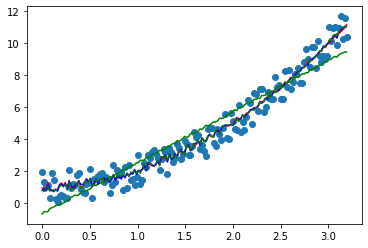

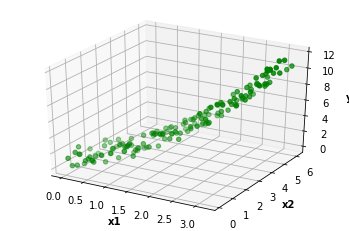

In [8]:
degree=2
poly_fit = np.poly1d(np.polyfit(X_train[:,1], Y_train, degree))
print(poly_fit)
xx=np.linspace(0, 6, 159)

plt.gca().get_xaxis()
plt.gca().xaxis
axes = plt.gca()
#axes.set_xlim(1,1.5)
#axes.set_ylim(1,3)

#plt.plot(xx, poly_fit(xx), c='r', linestyle='-')

plt.plot(X_train[:,1], resultatXCFS_LIN, c='g', linestyle='-')
plt.plot(X_train[:,1], resultatXCFS_PAR, c='r', linestyle='-')
plt.plot(X_train[:,1], resultatXCFS_CUB, c='b', linestyle='-')
plt.plot(X_train[:,1], resultatXCFS_RID, c='g', linestyle='--')

plt.scatter(X_train[:,1], Y_train)
plt.show()

fig1 = plt.figure()
ax1 = plt.axes(projection = "3d")
ax1.scatter3D(x1, x2, y, color="green")
ax1.set_xlabel('x1', fontweight='bold')
ax1.set_ylabel('x2', fontweight='bold')
ax1.set_zlabel('y', fontweight='bold')
plt.show()

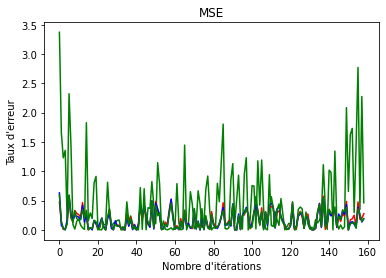

In [55]:
#MSE
errorlistLIN=mse(resultatXCFS_LIN,Y_train)
plt.plot(errorlistLIN, c='g')

errorlistPAR=mse(resultatXCFS_PAR,Y_train)
plt.plot(errorlistPAR, c='r')

errorlistCUB=mse(resultatXCFS_CUB,Y_train)
plt.plot(errorlistCUB, c='b')

errorlistRID=mse(resultatXCFS_RID,Y_train)
plt.plot(errorlistRID, c='g')

plt.xlabel('Nombre d\'itérations')
plt.ylabel('Taux d\'erreur')
plt.title('MSE')
plt.show()


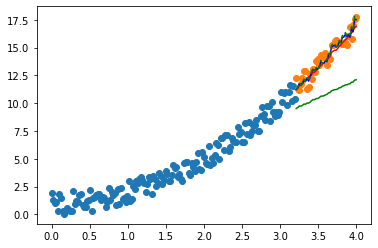

In [51]:
resultatXCFS_LIN_test = []
resultatXCFS_PAR_test = []
resultatXCFS_CUB_test = []
resultatXCFS_RID_test = []

for i in range(3):
    hypothesisT=np.dot(thetacfsLIN[i],X_test[:,i])
    
    resultatXCFS_LIN_test.append(hypothesisT)
    
resultatXCFS_LIN_test = np.sum(resultatXCFS_LIN_test, axis=0)

"""PARABOLIC"""
X_test=np.insert(X_test, 3, X_test[:,1]**2, axis=1)
X_test=np.insert(X_test, 4, X_test[:,2]**2, axis=1)
X_test=np.insert(X_test, 5, X_test[:,1]*X_test[:,2], axis=1)
for i in range(6):
    
    hypothesisT=np.dot(thetacfsPAR[i],X_test[:,i])
    
    resultatXCFS_PAR_test.append(hypothesisT)
    
resultatXCFS_PAR_test = np.sum(resultatXCFS_PAR_test, axis=0)

"""CUBIC"""
X_test=np.insert(X_test, 6, X_test[:,1]**3, axis=1)
X_test=np.insert(X_test, 7, X_test[:,2]**3, axis=1)
X_test=np.insert(X_test, 8, (X_test[:,1]**2)*X_test[:,2], axis=1)
X_test=np.insert(X_test, 9, X_test[:,1]*(X_test[:,2]**2), axis=1)

for i in range(10):
    hypothesisT=np.dot(thetacfsCUB[i],X_test[:,i])
    
    resultatXCFS_CUB_test.append(hypothesisT)
#print(resultatXCFS_CUB_test) 
resultatXCFS_CUB_test = np.sum(resultatXCFS_CUB_test, axis=0)

for i in range(10):
    hypothesisT=np.dot(thetacfsRID[i],X_test[:,i])
    
    resultatXCFS_RID_test.append(hypothesisT)
    
resultatXCFS_RID_test = np.sum(resultatXCFS_RID_test, axis=0)

plt.plot(X_test[:,1], resultatXCFS_LIN_test, c='g', linestyle='-')
plt.plot(X_test[:,1], resultatXCFS_PAR_test, c='r', linestyle='-')
plt.plot(X_test[:,1], resultatXCFS_CUB_test, c='b', linestyle='-')
plt.plot(X_test[:,1], resultatXCFS_RID_test, c='g', linestyle='--')

#plt.scatter(X_test[:,-1], Y_test)
plt.scatter(X_train[:,1], Y_train)
plt.scatter(X_test[:,1], Y_test)

plt.show()


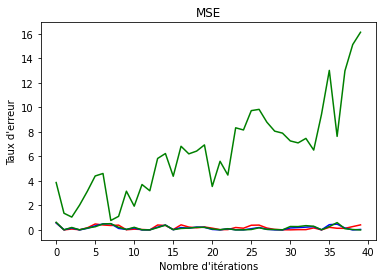

In [54]:
#MSE
errorlistLIN_T=mse(resultatXCFS_LIN_test,Y_test)
plt.plot(errorlistLIN_T, c='g')

errorlistPAR_T=mse(resultatXCFS_PAR_test,Y_test)
plt.plot(errorlistPAR_T, c='r')

errorlistCUB_T=mse(resultatXCFS_CUB_test,Y_test)
plt.plot(errorlistCUB_T, c='b')

errorlistRID_T=mse(resultatXCFS_RID_test,Y_test)
plt.plot(errorlistRID_T, c='g')

plt.xlabel('Nombre d\'itérations')
plt.ylabel('Taux d\'erreur')
plt.title('MSE')
plt.show()

